## Import Library

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
data_set = pd.read_csv('./dataset/data.csv', error_bad_lines = False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

In [3]:
data_set.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


## Check unique Values in strength column 

In [4]:
data_set['strength'].unique()

array([1, 2, 0])

0 refers, it is a poor length <br>
1 refers, it is a normal length <br>
2 refers, it is a strong length <br>

## Checked if there is any null values

In [5]:
data_set.isna().sum()

password    1
strength    0
dtype: int64

## Checking in which row there is nan values

In [6]:
data_set[data_set['password'].isnull()]

,password,strength
367579,NaN,0


 ## Drop NaN values

In [7]:
data_set.dropna(inplace = True)

In [8]:
data_set.isna().sum()

password    0
strength    0
dtype: int64

## Checking different different Category in given password

<AxesSubplot:xlabel='strength', ylabel='count'>

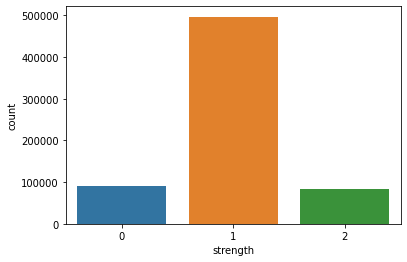

In [9]:
sns.countplot(data_set['strength'])

## Seperate dependent and independent variables 

In [10]:
password_tuple = np.array(data_set)
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

## Before separating my data, I am going to shuffle my data so that it will provide robustness to my model

In [11]:
import random 
random.shuffle(password_tuple)

In [12]:
x_Data = [indep_data[0] for indep_data in password_tuple]

In [13]:
y_Data = [dep_data[1] for dep_data in password_tuple]
y_Data[1:5]

[1, 1, 1, 1]

## Data Preprocessing 

In [15]:
def word_divide_char(inputs):
    charactes = []
    for i in inputs:
        charactes.append(i)
    return charactes

In [16]:
word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tf_idf = TfidfVectorizer(tokenizer = word_divide_char)

In [19]:
x = tf_idf.fit_transform(x_Data)

In [20]:
x.shape

(669639, 127)

In [21]:
tf_idf.get_feature_names()

['\x01',
 '\x05',
 '\x0f',
 '\x10',
 '\x11',
 '\x16',
 '\x17',
 '\x1b',
 '\x1c',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x8d',
 '\xa0',
 '¡',
 '¤',
 '¦',
 '¨',
 '«',
 '¯',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '·',
 'º',
 '¼',
 '¾',
 '¿',
 'ß',
 'à',
 'á',
 'â',
 'ã',
 'ä',
 'å',
 'æ',
 'è',
 'ê',
 'í',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 'œ',
 '—',
 '‚',
 '‡',
 '‹',
 '›']

## Object of Sparse Matrix

In [22]:
first_document_vector = x[0]
first_document_vector

<1x127 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

## Transforming sparse matrix to get data

In [23]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56670579],
        [0.        ],
        [0.59206409],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [24]:
df = pd.DataFrame(first_document_vector.T.todense(), index = tf_idf.get_feature_names(), columns = ['TF-IDF'])
df.sort_values(by = ['TF-IDF'], ascending = False)

,TF-IDF
7,0.592064
5,0.566706
z,0.335910
k,0.291625
d,0.285393
...,...
?,0.000000
>,0.000000
=,0.000000
<,0.000000


## Split data in train set and test set

In [25]:
from sklearn.model_selection import train_test_split

In [ ]:
y_Data = np.array(y_Data)
y_Data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y_Data, train_size = 0.8, test_size = 0.2, 
                                                    random_state = 70311, stratify=y_Data, shuffle = True)

In [27]:
print('X_train ->', X_train.shape)
print('X_test  ->', X_test.shape)
print('y_train ->', y_train.shape)
print('y_test  ->', y_test.shape)

X_train -> (535711, 127)
X_test  -> (133928, 127)
y_train -> (535711,)
y_test  -> (133928,)


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model_lr = LogisticRegression(random_state = 70311, multi_class='multinomial')

In [30]:
model_lr.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=70311)

In [31]:
predictions = model_lr.predict(X_test)

## Predict new password of user 

In [32]:
password = input('Enter which password you want to predict: ')

Enter which password you want to predict: ansaossu1432567@##


In [33]:
password_pred = np.array([password])
pred = tf_idf.transform(password_pred)
model_lr.predict(pred)

array([2])

In [34]:
if model_lr.predict(pred) == np.array([0]):
    print('Your password "{}" is weak.'.format(password))
elif model_lr.predict(pred) == np.array([1]):
    print('Your password "{}" is Medium.'.format(password))
else:
    print('Your password "{}" is Strong.'.format(password))

Your password "ansaossu1432567@##" is Strong.


## Checking accuracy of your model

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [44]:
y_predicted =  np.array(model_lr.predict(X_test))
y_right = np.array(y_test)

cnf = confusion_matrix(y_right, y_predicted )
np.set_printoptions(precision=2)
cnf

array([[ 5466, 12504,    17],
       [ 3895, 92972,  2547],
       [   36,  5087, 11404]])

In [45]:
accuracy = accuracy_score(y_right, y_predicted)
accuracy

0.8201570993369571

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_right, y_predicted))

              precision    recall  f1-score   support

           0       0.58      0.30      0.40     17987
           1       0.84      0.94      0.89     99414
           2       0.82      0.69      0.75     16527

    accuracy                           0.82    133928
   macro avg       0.75      0.64      0.68    133928
weighted avg       0.80      0.82      0.80    133928



In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
random_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter' : [100, 500, 1000],
    'multi_class' : ['auto','ovr', 'multinomial']
}

In [58]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor()

lr_model = LogisticRegression()

In [59]:
rf_random = RandomizedSearchCV(estimator = lr_model, param_distributions = random_grid, cv = 3, verbose = 2,
                  n_jobs = -1 )

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
rf_random.best_params_

# Thank You!